In [1]:
from fastai.vision.all import *
import timm

In [2]:
Path.BASE_PATH=path=Path.home()
trn_path=path/'train_images'
path.ls()

(#25) [Path('.profile'),Path('.bashrc'),Path('.fastai'),Path('.local'),Path('.nv'),Path('.ipynb_checkpoints'),Path('.ssh'),Path('train_images'),Path('.bash_history'),Path('.cache')...]

In [3]:
blb=trn_path/'bacterial_leaf_blight'

In [4]:
df=pd.read_csv(path/'train.csv')
df

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45
...,...,...,...,...
10402,107607.jpg,tungro,Zonal,55
10403,107811.jpg,tungro,Zonal,55
10404,108547.jpg,tungro,Zonal,55
10405,110245.jpg,tungro,Zonal,55


In [5]:
img=PILImage.create(blb/'100330.jpg')

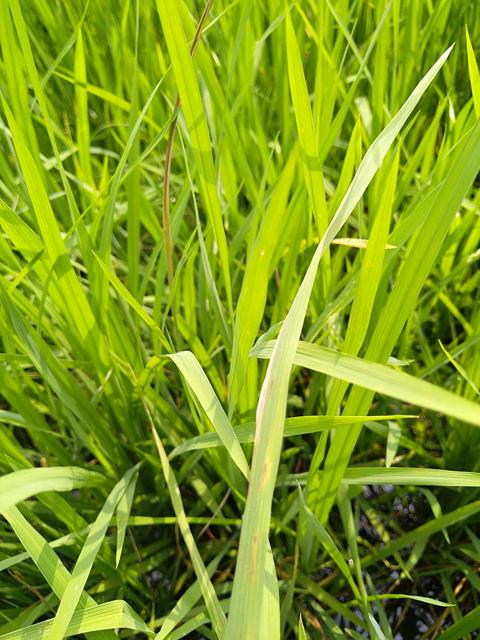

In [6]:
img

In [7]:
img.size

(480, 640)

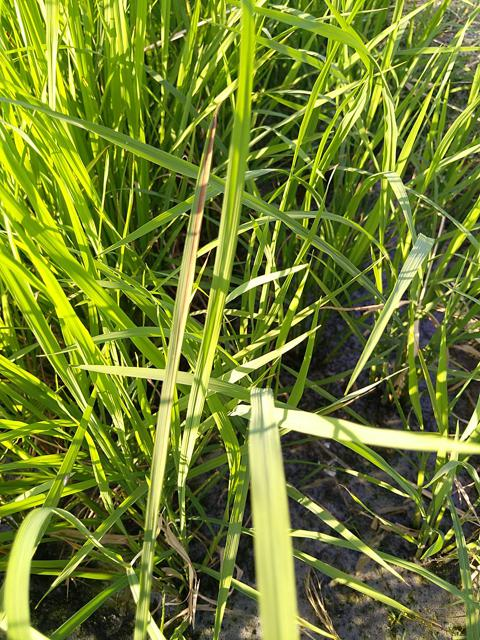

In [8]:
files=get_image_files(trn_path)
img=PILImage.create(files[0])
img

In [9]:
%time sizes=[PILImage.create(o).size for o in files]

CPU times: user 25.8 s, sys: 607 ms, total: 26.4 s
Wall time: 26.4 s


In [10]:
from fastcore.parallel import *

In [11]:
def f(o): return PILImage.create(o).size

In [12]:
%time sizes=parallel(f,files,n_workers=4)

CPU times: user 3.91 s, sys: 825 ms, total: 4.73 s
Wall time: 27.2 s


In [13]:
%time sizes=parallel(f,files,n_workers=8)

CPU times: user 4.09 s, sys: 970 ms, total: 5.06 s
Wall time: 35.3 s


In [14]:
%time sizes=parallel(f,files,n_workers=12)

CPU times: user 4.33 s, sys: 987 ms, total: 5.32 s
Wall time: 36.9 s


In [10]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42,item_tfms=Resize(224))

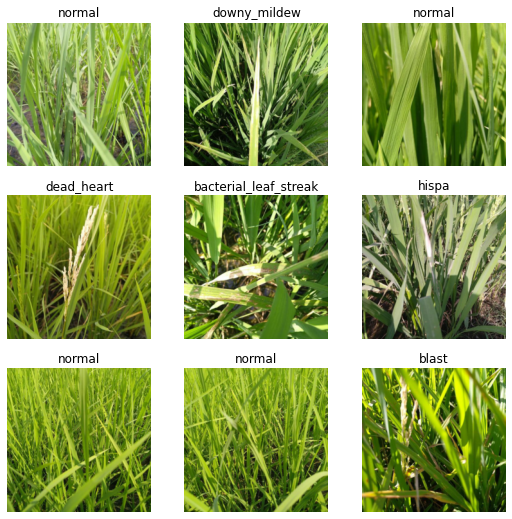

In [11]:
dls.show_batch()

In [12]:
learn = vision_learner(dls, "convnext_small_in22k", metrics=error_rate)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_small_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_small_22k_224.pth


In [13]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.180420,0.525683,0.165786,03:34


epoch,train_loss,valid_loss,error_rate,time
0,0.558028,0.320093,0.101874,12:10
1,0.354257,0.229696,0.075444,12:09


In [14]:
tst_files=get_image_files(path/'test_images')

In [16]:
sorted(tst_files)

[Path('test_images/200001.jpg'),
 Path('test_images/200002.jpg'),
 Path('test_images/200003.jpg'),
 Path('test_images/200004.jpg'),
 Path('test_images/200005.jpg'),
 Path('test_images/200006.jpg'),
 Path('test_images/200007.jpg'),
 Path('test_images/200008.jpg'),
 Path('test_images/200009.jpg'),
 Path('test_images/200010.jpg'),
 Path('test_images/200011.jpg'),
 Path('test_images/200012.jpg'),
 Path('test_images/200013.jpg'),
 Path('test_images/200014.jpg'),
 Path('test_images/200015.jpg'),
 Path('test_images/200016.jpg'),
 Path('test_images/200017.jpg'),
 Path('test_images/200018.jpg'),
 Path('test_images/200019.jpg'),
 Path('test_images/200020.jpg'),
 Path('test_images/200021.jpg'),
 Path('test_images/200022.jpg'),
 Path('test_images/200023.jpg'),
 Path('test_images/200024.jpg'),
 Path('test_images/200025.jpg'),
 Path('test_images/200026.jpg'),
 Path('test_images/200027.jpg'),
 Path('test_images/200028.jpg'),
 Path('test_images/200029.jpg'),
 Path('test_images/200030.jpg'),
 Path('tes

In [17]:
tst_dl=dls.test_dl(tst_files)

In [18]:
preds=learn.get_preds(dl=tst_dl,with_decoded=True)

In [19]:
probs,_,idxs=preds

In [20]:
idxs=pd.Series(idxs.numpy(),name="idxs")
idxs

0       1
1       4
2       3
3       4
4       6
       ..
3464    9
3465    9
3466    6
3467    3
3468    3
Name: idxs, Length: 3469, dtype: int64

In [21]:
mapping={k:v for k,v in enumerate(dls.vocab)}

In [22]:
results=idxs.map(mapping)

In [23]:
ss=pd.read_csv('sample_submission.csv')
ss['label']=results

In [24]:
ss.to_csv("subm.csv",index=False)

In [25]:
!head subm.csv

image_id,label
200001.jpg,bacterial_leaf_streak
200002.jpg,brown_spot
200003.jpg,blast
200004.jpg,brown_spot
200005.jpg,downy_mildew
200006.jpg,normal
200007.jpg,dead_heart
200008.jpg,tungro
200009.jpg,blast
